## Теоретическая часть

__1. Вспомним прошлый вебинар, мы рассматривали User-User рекомендации и Item-Item рекомендации. Чем они отличаются и чем они похожи? Если есть функция item_item_rec(interaction_matrix). Можно ли использовать эту функцию для user_user_rec?  
В чем принципиальные отличия item-item рекомендаций от ALS?__

### Ответ

__Отличаются как бизнес сущности, т.е. причины, подобия и различия:__
<br>Товары группируются в товарные категории по схожести потребитесльских свойств (машины и детали, одежда, продукты, природные ресурсы), а также делятся в зависимости от премиальных свойств, пример - ценовые группы (бюджетные, премиальные), сопутствующие другим товарам и товары первой необходимости и т.п. Потребители грппируются по демографическим, половым и возрастным признакам, а также по истории покупок, социальному слою, семейному положению, вероисповедению и местам проживания и т.д. Все эти свойтсва позволяют четко сегментировать покупательские группы.
<br>Подобие Item-Item и User-User проявляется при транспонировании матрицы, т.е. с точки зрения работы модели четкого различия нет (важны сочетания и варианты подобия)

Отличие в том, что детерминированные алгоритмы используют КНН для нахождения подрбных, в то время как ALS итеративный метод градиентного спуска. 

__2. Приведите 3 примера весов (те, которых не было на вебинаре: сумма покупок, количество покупок - неинтересно) user-item матрицы для задачи рекомендаций товаров__

### Ответ

- Даты покупок
- Средний чек по товару
- Средний чек по клиенту (группе клиентов) в течении квартала
- Отношение просмотров к продажам товара

__3. Какие ограничения есть у ALS? (Тип информации, линейность/нелинейность факторов и т д)__

### Ответ

Данные в эмбединге это вещественные числа. Функция ошибок непрерывная, выпуклая и дифференцируемая.

__4. Мы рассматривали bm_25_weight. 
Опишите, как он работает. Как сделать рекомендации только на основе bm_25? (Можно и нужно пользоваться любыми источниками, приложите на них ссылки). Какие еще способы перевзвешивания user-item матрицы Вы знаете / можете предложить (ещё 2-3 способа)?__

### Ответ

__Okapi BM25__ (best match) — поисковая функция на неупорядоченном множестве термов («мешке слов») и множестве документов, которые она оценивает на основе встречаемости слов запроса в каждом документе, без учёта взаимоотношений между ними (например, близости). Это не одна функция, а семейство функций с различными компонентами и параметрами.

Основана на эмпирических данных при попытке улучшить результаты работы критерия TF-IDF. Наилучшее соответствие между ожидаемым результатом и рассчитанным показал 25 алгоритм в списке, за что и получил свое название «Best matching», или BM25.

Суть функции заключается в определении релевантности документа к поисковому запросу. Т. е. документ анализируется, значения проставляются в формулу, где идет расчет относительно других документов в коллекции и выдается некая конечная оценка, которая влияет на ранжирование документа в поисковой выдаче.

Сама функция носит название BM25 (BM от англ. best match), но её часто называют «Okapi BM25» по названию поисковой системы Okapi, созданной в Лондонском городском университете в 1980-х и 1990-х годах, в которой эта функция была впервые применена.
<br>
<img src="http://latex.codecogs.com/gif.latex?\inline&space;score(D,Q)=\sum_{i=1}^{n}IDF(q_{i},D)*\frac{f(q_{i},D)*(k_{1}+1)}{f(q_{i},D)+k_{1}*(1-b+b*\frac{\bar{D}}{avg\:&space;dl&space;})}">
<br>
IDF (qi) представляет из себя обратную документную частоту слова qi. В классическом варианте в BM25 она определяется так:
<br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/20e3fe9f6c2828cb8cc0aa6e3de1bbea9e1a6775">
<br>
f (qi, D) это частота слова qi в документе D, |D| является длиной документа (рассчитывается из количества в нем слов). avgdl — это средняя длина документа в коллекции. k1 и b — это свободные коэффициенты, зачастую выбирают как k1 = 2.0 и b = 0.75.

В функцию БМ25 внедрены свободные коэффициенты, которые могут принимать различные значения. Они подбираются так, чтобы «подогнать» результат работы поиска под заранее имеющиеся данные. Документы сначала оценивают асессоры, которые и говорят что плохо, а что хорошо. Затем на основании этих данных выбирают упомянутые коэффициенты, чтобы расположить документы так же, как это сделали асессоры – так называемый «принцип обезьянки».

Чаще применяются «сглаженные» варианты этой формулы, например:
<br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c652b6871ce4872c8e924ff0f806bc8b06dc94ed">
<br>
При экстремальных значениях коэффициента b в функции BM25 получаются функции ранжирования, известные под названиями BM11 (при b=1) и BM15 (при b=0)

### Процентный рост BM25 от числа вхождений
<br>
<img src="http://webline.blog/wp-content/uploads/2019/09/BM25-1-1024x621.png">
<br>
<img src="http://webline.blog/wp-content/uploads/2019/09/BM25-2-1024x621.png">
<br>
Источники:<br>
1. https://ru.wikipedia.org/wiki/Okapi_BM25
2. http://webline.blog/algoritm-okapi-bm25-modifikacziya-formuly-tf-idf-ranzhirovaniya-dokumentov/


## Практическая часть


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install implicit

     |████████████████████████████████| 1.1MB 6.6MB/s 
  Created wheel for implicit: filename=implicit-0.4.4-cp36-cp36m-linux_x86_64.whl size=3419488 sha256=3a1249c419f84347a5fee0e5b30dc21e3c77411fa4a1b8949e7426c5d9a763ec
  Stored in directory: /root/.cache/pip/wheels/bf/d4/ec/fd4f622fcbefb7521f149905295b2c26adecb23af38aa28217
Successfully built implicit


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Для работы с матрицами
from scipy.sparse import csr_matrix

# Матричная факторизация
from implicit.als import AlternatingLeastSquares
from implicit.nearest_neighbours import bm25_weight, tfidf_weight

from time import time

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Recomendation/retail_train.csv') 

data.columns = [col.lower() for col in data.columns]
data.rename(columns={'household_key': 'user_id',
                     'product_id': 'item_id'},
            inplace=True)

test_size_weeks = 3

data_train = data[data['week_no'] <  data['week_no'].max() - test_size_weeks]
data_test  = data[data['week_no'] >= data['week_no'].max() - test_size_weeks]

data_train.head(2)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0


In [ ]:
user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', # Можно пробовать другие варианты
                                  aggfunc='count', 
                                  fill_value=0)

user_item_matrix = user_item_matrix.astype(float) # необходимый тип матрицы для implicit

# переведем в формат saprse matrix
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

user_item_matrix.head(3)

item_id,25671,26081,26093,26190,26355,26426,26540,26601,26636,26691,26738,26889,26941,27021,27030,27152,27158,27159,27323,27334,27346,27404,27479,27491,27503,27509,27510,27522,27558,27633,27657,27658,27686,27695,27697,27732,27735,27745,27754,27760,...,17249003,17249285,17249614,17249651,17282500,17282612,17283027,17283348,17283671,17283763,17284209,17284296,17284297,17284346,17284401,17284423,17284629,17285065,17291184,17291554,17291665,17319084,17320591,17320698,17320734,17320911,17321083,17321092,17328261,17328345,17328742,17329473,17329749,17330255,17330511,17381856,17382205,17383227,17827644,17829232
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
userids = user_item_matrix.index.values
itemids = user_item_matrix.columns.values

matrix_userids = np.arange(len(userids))
matrix_itemids = np.arange(len(itemids))

id_to_itemid = dict(zip(matrix_itemids, itemids))
id_to_userid = dict(zip(matrix_userids, userids))

itemid_to_id = dict(zip(itemids, matrix_itemids))
userid_to_id = dict(zip(userids, matrix_userids))

In [ ]:
def precision_at_k_l(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)

    bought_list = bought_list
    recommended_list = recommended_list[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    return precision

In [ ]:
def get_recommendations(user, model, N=5):
    res = [id_to_itemid[rec[0]] for rec in 
                    model.recommend(userid=userid_to_id[user], 
                                    user_items=sparse_user_item,   # на вход user-item matrix
                                    N=N, 
                                    filter_already_liked_items=False, 
                                    filter_items=None, 
                                    recalculate_user=True)]
    return res

In [ ]:
def get_precision_at_k_score(result, user_item_matrix, name, iterat=15, fact=100, regularizat=0.001):
    
    time_begin = time()
    
    model = AlternatingLeastSquares(factors=fact, 
                                    regularization=regularizat,
                                    iterations=iterat, 
                                    calculate_training_loss=True, 
                                    num_threads=4)

    model.fit(csr_matrix(user_item_matrix).T.tocsr(),  # На вход item-user matrix
              show_progress=False)

    result[name] = result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))

    score = result.apply(lambda row: precision_at_k_l(row[name], row['actual']), axis=1).mean()
    
    time_finish = time()
    
    return score, time_finish-time_begin, model

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Подбор матрицы $c_{ui}$
Попробуйте различные варианты матрицы весов (3+ вариантов). Обучите алгоритм для различных $C$. В качестве результата приведите таблицу: матрица весов - результат на train и validation.
Сделате качественные выводы.

In [ ]:
prec_5 = {}

result = data_test.groupby('user_id')['item_id'].unique().reset_index()
result.columns=['user_id', 'actual']
result.head(2)

,user_id,actual
0,1,"[821867, 834484, 856942, 865456, 889248, 90795..."
1,3,"[835476, 851057, 872021, 878302, 879948, 90963..."


#### Случайные веса

In [ ]:
def set_random_weight(user_item_matrix):
    weights = np.random.rand(user_item_matrix.shape[0], user_item_matrix.shape[1])
    return user_item_matrix*weights

In [ ]:
for i in range(1, 4):
    name = "rand_"+str(i)
    prec_5[name], time_len, _ = get_precision_at_k_score(result, set_random_weight(user_item_matrix), name, iterat=50)
    print(f"ALS {name}: {prec_5[name]:.4f} длительность: {time_len:.4f} c")

GPU training requires factor size to be a multiple of 32. Increasing factors from 100 to 128.


ALS rand_1: 0.1608 длительность: 117.4435 c


ALS rand_2: 0.1585 длительность: 114.8436 c


ALS rand_3: 0.1607 длительность: 115.2026 c


#### Логарифмические веса

In [ ]:
w_m = set_random_weight(user_item_matrix)

w_m = np.log(w_m[w_m > 0])

In [ ]:
w_m = w_m.fillna(0.0)

In [ ]:
name = "log"

prec_5[name], time_len, _ = get_precision_at_k_score(result, w_m, name, iterat=50)
f"ALS log: {prec_5['log']:.4f} длительность: {time_len:.4f} c"

'ALS log: 0.1224 длительность: 126.7906 c'

#### TF-IDF взвешивание

In [ ]:
name = "tfidf"
user_item_matrix_tfidf = tfidf_weight(user_item_matrix.T).T

prec_5[name], time_len, _ = get_precision_at_k_score(result, user_item_matrix_tfidf, name, iterat=50)
f"ALS tfidf: {prec_5['tfidf']:.4f} длительность: {time_len:.4f} c"

'ALS tfidf: 0.2270 длительность: 122.5864 c'

#### BM25 взвешивание

In [ ]:
name = "bm25"
user_item_matrix_bm25 = bm25_weight(user_item_matrix.T).T

prec_5[name], time_len, _ = get_precision_at_k_score(result, user_item_matrix_bm25, name, iterat=50)
f"ALS bm25: {prec_5['bm25']:.4f} длительность: {time_len:.4f} c"

'ALS bm25: 0.2288 длительность: 124.7434 c'

#### Список результатов

In [ ]:
for k, v in dict(sorted(prec_5.items(), key=lambda item: item[1])).items():
    print(f"Precision@5: {v:0.4f} - ALS {k}")

Precision@5: 0.1224 - ALS log
Precision@5: 0.1585 - ALS rand_2
Precision@5: 0.1607 - ALS rand_3
Precision@5: 0.1608 - ALS rand_1
Precision@5: 0.2270 - ALS tfidf
Precision@5: 0.2288 - ALS bm25


### Оптимизация гипперпараметров
Для лучшей матрицы весов из первого задания подберите оптимальные $\lambda$ и n_factors. Подбор можно делать вручную (цикл в цикле, аналог sklearn.GridSearch, или случайно - sklearn.GridSearch). Или Вы можете воспользоваться библиотеками для автоматического подбора гипперпараметров (любые на Ваш вкус). В качестве результата постройте графики:
1. Значение параметра - время обучения 
2. Значение параметра - качество train, качество validation  

Сделайте качественные выводы

In [ ]:
summary_data = pd.DataFrame(data=[[0, 0, 0, 0, 0]], 
                            columns=['factors', 'regularization', 'iterations', 'time', 'precision@5'])
cnt = 0
factors = [50, 100, 150]
regularization = [0.01, 0.001, 0.0001]
iterations = [15, 50, 100]

for fact in factors:
    for reg in regularization:
        for iterat in iterations:
            name = f"ALS_{fact}_{reg}_{iterat}"
            print(f"ALS: factors {fact}, regularization {reg}, iterations {iterat}")
            score, time_len, model = get_precision_at_k_score(result, 
                                                              user_item_matrix, 
                                                              name, 
                                                              iterat=iterat, 
                                                              fact=fact, 
                                                              regularizat=reg)
            print(f"   Precision@5: {score:0.4f}, длительность: {time_len:.4f} c\n")
            summary_data.loc[cnt, ['factors', 'regularization', 'iterations', 
                                   'time', 'precision@5']] = [fact, reg, iterat, 
                                                              time_len, score]
            cnt += 1

ALS: factors 50, regularization 0.01, iterations 15


   Precision@5: 0.1933, длительность: 67.8716 c

ALS: factors 50, regularization 0.01, iterations 50


   Precision@5: 0.1888, длительность: 69.2034 c

ALS: factors 50, regularization 0.01, iterations 100


   Precision@5: 0.1869, длительность: 72.7848 c

ALS: factors 50, regularization 0.001, iterations 15


   Precision@5: 0.1902, длительность: 66.3183 c

ALS: factors 50, regularization 0.001, iterations 50


   Precision@5: 0.1882, длительность: 68.7925 c

ALS: factors 50, regularization 0.001, iterations 100


   Precision@5: 0.1863, длительность: 72.6676 c

ALS: factors 50, regularization 0.0001, iterations 15


   Precision@5: 0.1894, длительность: 65.7236 c

ALS: factors 50, regularization 0.0001, iterations 50


   Precision@5: 0.1886, длительность: 71.1675 c

ALS: factors 50, regularization 0.0001, iterations 100


   Precision@5: 0.1862, длительность: 73.0078 c

ALS: factors 100, regularization 0.01, iterations 15


   Precision@5: 0.1817, длительность: 123.3761 c

ALS: factors 100, regularization 0.01, iterations 50


   Precision@5: 0.1826, длительность: 128.8230 c

ALS: factors 100, regularization 0.01, iterations 100


   Precision@5: 0.1837, длительность: 136.2585 c

ALS: factors 100, regularization 0.001, iterations 15


   Precision@5: 0.1834, длительность: 122.5276 c

ALS: factors 100, regularization 0.001, iterations 50


   Precision@5: 0.1828, длительность: 127.6345 c

ALS: factors 100, regularization 0.001, iterations 100


   Precision@5: 0.1802, длительность: 137.0382 c

ALS: factors 100, regularization 0.0001, iterations 15


   Precision@5: 0.1815, длительность: 124.4915 c

ALS: factors 100, regularization 0.0001, iterations 50


   Precision@5: 0.1805, длительность: 129.0692 c

ALS: factors 100, regularization 0.0001, iterations 100


   Precision@5: 0.1820, длительность: 136.1293 c

ALS: factors 150, regularization 0.01, iterations 15


   Precision@5: 0.1780, длительность: 146.5343 c

ALS: factors 150, regularization 0.01, iterations 50


   Precision@5: 0.1719, длительность: 148.4984 c

ALS: factors 150, regularization 0.01, iterations 100


   Precision@5: 0.1741, длительность: 157.6477 c

ALS: factors 150, regularization 0.001, iterations 15


   Precision@5: 0.1794, длительность: 142.1859 c

ALS: factors 150, regularization 0.001, iterations 50


   Precision@5: 0.1735, длительность: 148.4458 c

ALS: factors 150, regularization 0.001, iterations 100


   Precision@5: 0.1723, длительность: 157.9205 c

ALS: factors 150, regularization 0.0001, iterations 15


   Precision@5: 0.1766, длительность: 142.5698 c

ALS: factors 150, regularization 0.0001, iterations 50


   Precision@5: 0.1745, длительность: 148.3939 c

ALS: factors 150, regularization 0.0001, iterations 100
   Precision@5: 0.1721, длительность: 157.4052 c



In [ ]:
summary_data

,factors,regularization,iterations,time,precision@5
0,50.0,0.0100,15.0,67.871625,0.193340
1,50.0,0.0100,50.0,69.203415,0.188834
2,50.0,0.0100,100.0,72.784821,0.186876
3,50.0,0.0010,15.0,66.318341,0.190206
4,50.0,0.0010,50.0,68.792535,0.188247
5,50.0,0.0010,100.0,72.667581,0.186288
6,50.0,0.0001,15.0,65.723615,0.189422
7,50.0,0.0001,50.0,71.167543,0.188639
8,50.0,0.0001,100.0,73.007838,0.186190
9,100.0,0.0100,15.0,123.376110,0.181685


In [ ]:
summary_data.sort_values('precision@5', ascending=False)

,factors,regularization,iterations,time,precision@5
0,50.0,0.0100,15.0,67.871625,0.193340
3,50.0,0.0010,15.0,66.318341,0.190206
6,50.0,0.0001,15.0,65.723615,0.189422
1,50.0,0.0100,50.0,69.203415,0.188834
7,50.0,0.0001,50.0,71.167543,0.188639
4,50.0,0.0010,50.0,68.792535,0.188247
2,50.0,0.0100,100.0,72.784821,0.186876
5,50.0,0.0010,100.0,72.667581,0.186288
8,50.0,0.0001,100.0,73.007838,0.186190
11,100.0,0.0100,100.0,136.258548,0.183741


In [ ]:
sorted_scores = summary_data.sort_values('precision@5', ascending=True)['precision@5'].values
sorted_reg = summary_data.sort_values('precision@5', ascending=True).regularization.values
sorted_factors = summary_data.sort_values('precision@5', ascending=True).factors.values
sorted_iterat = summary_data.sort_values('precision@5', ascending=True).iterations.values
sorted_times = summary_data.sort_values('precision@5', ascending=True).time.values
sorted_times

array([148.4984107 , 157.40518212, 157.92048049, 148.44577312,
       157.64766502, 148.39393878, 142.56981707, 146.53428078,
       142.18590975, 137.03816247, 129.06916142, 124.4914515 ,
       123.37610984, 136.12930608, 128.82298517, 127.63445187,
       122.52761126, 136.25854778,  73.00783801,  72.6675806 ,
        72.78482103,  68.79253459,  71.16754293,  69.20341468,
        65.72361493,  66.31834078,  67.87162471])

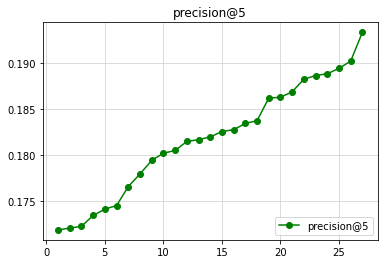

In [ ]:
plt.plot(np.arange(1, len(sorted_scores)+1), sorted_scores, 'go-', label='precision@5')

plt.legend(loc="lower right")
plt.grid(color="lightgrey")
plt.title('precision@5')
plt.show()

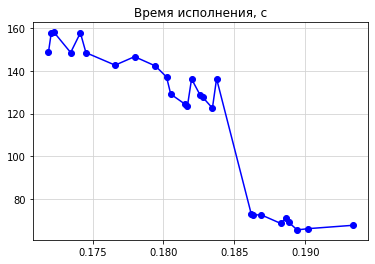

In [ ]:
plt.plot(sorted_scores, sorted_times, 'bo-')

plt.grid(color="lightgrey")
plt.title('Время исполнения, с')
plt.show()

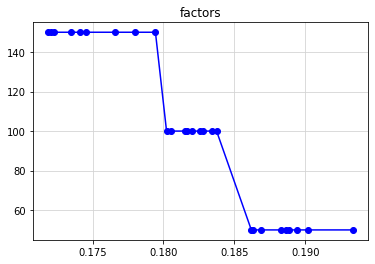

In [ ]:
plt.plot(sorted_scores, sorted_factors, 'bo-')

plt.grid(color="lightgrey")
plt.title('factors')
plt.show()

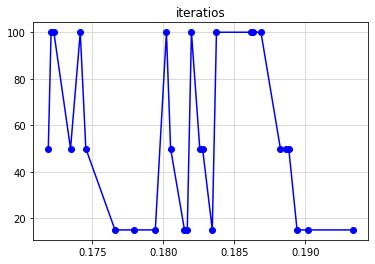

In [ ]:
plt.plot(sorted_scores, sorted_iterat, 'bo-')

plt.grid(color="lightgrey")
plt.title('iteratios')
plt.show()

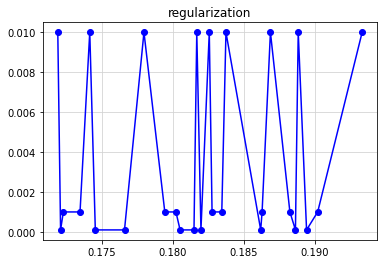

In [ ]:
plt.plot(sorted_scores, sorted_reg, 'bo-')

plt.grid(color="lightgrey")
plt.title('regularization')
plt.show()

### Вопрос

Остался вопрос с валидацией. Метрику мы считаем на массиве result полученном из data_test (это наш valid получается).
Рассчитать метрику на train - нужно подавать матрицу user_item_matrix?

Несколько всё перемешалось :(

## Выводы

1. Изменение числа факторов находится в обратной связи с метрикой - это удивтельно. __Изменеие числа факторов оказывает самое сильное влияние на метрику.__
2. Прямой зависимости метрики от количества итераций не установлено, тоже не очевидный результат
3. Также нет прямой зависимости от величины коэффициента регуляризации. 
4. Нет очевидного влияния взаимного изменения гиперпараметров
5. __Подбор гиперпараметров оказывает умеренное влияние на метрику__